## Create a new raster with the checkerboard pattern

In [16]:
import json    
from arcpy.sa import RasterInfo, Raster 
from arcpy.ia import Render

In [17]:
# Create an empty RasterInfo object  
myRasterInfo = RasterInfo()  
  
# Load raster info from a Python dictionary  
myRasterInfoData = {  
  'bandCount': 1,  
  'extent': {  
    'xmin': -107.0,  
    'ymin': 38.0,  
    'xmax': -104.0,  
    'ymax': 40.0,  
    'spatialReference': {'wkid': 4326},  
  },  
  'pixelSizeX': 0.01,  
  'pixelSizeY': 0.01,  
  'pixelType': 'U8',  
}  

In [18]:
# Convert myRasterInfoData to a JSON string and load into myRasterInfo  
myRasterInfo.fromJSONString(json.dumps(myRasterInfoData))  
  
# Create a new Raster object based on myRasterInfo  
myRaster = Raster(myRasterInfo)  

In [19]:
for (r, c) in myRaster:   
    # Checkerboard with 10 pixels width  
    if r % 20 < 10 and c % 20 < 10 or r % 20 >= 10 and c % 20 >= 10:  
        myRaster[r, c] = 1  
    else:  
        myRaster[r, c] = 0
myRaster.save(r'C:\output\checkerboard.tif')  

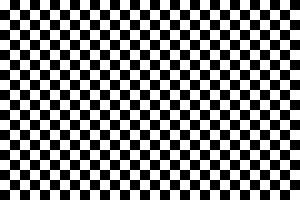

In [20]:
Render(myRaster, colormap="Black to White")